# TCC - Previsão de damanda por meio de aprendizado de máquina usando Análise de Sentimento

## Importação das bibliotecas necessárias para o projeto

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skew, kurtosis
#import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer

## Carregar os datasets que serão utilizados

In [2]:
# Carregar os datasets que serão utilizados
orders = pd.read_csv("Data/olist_orders_dataset.csv")
order_items = pd.read_csv("Data/olist_order_items_dataset.csv")
products = pd.read_csv("Data/olist_products_dataset.csv")
reviews = pd.read_csv("Data/olist_order_reviews_dataset.csv")
payments = pd.read_csv("Data/olist_order_payments_dataset.csv") 
sellers = pd.read_csv("Data/olist_sellers_dataset.csv")
customer =pd.read_csv("Data/olist_customers_dataset.csv")
geolocation = pd.read_csv("Data/olist_geolocation_dataset.csv")

## Concatenação das bases de dados

In [3]:
# Unindo tabelas pela chave primária
df = orders.merge(order_items, on="order_id", how="left")  # Junta pedidos com itens
df = df.merge(products, on="product_id", how="left")  # Junta produtos
df = df.merge(reviews, on="order_id", how="left")  # Junta avaliações
df = df.merge(payments, on="order_id", how="right")
df = df.merge(sellers, on="seller_id", how="right")
df = df.merge(customer, on="customer_id", how="right")

## Visualização inicial da base de dados

In [4]:
# Exibir as primeiras linhas
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,...,credit_card,2.0,146.87,8577.0,itaquaquecetuba,SP,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,...,credit_card,8.0,335.48,88303.0,itajai,SC,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,...,credit_card,7.0,157.73,8577.0,itaquaquecetuba,SP,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,...,credit_card,1.0,173.30,8577.0,itaquaquecetuba,SP,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,...,credit_card,8.0,252.25,14940.0,ibitinga,SP,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Exibir informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119091 entries, 0 to 119090
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   customer_id                    119091 non-null  object 
 2   order_status                   118315 non-null  object 
 3   order_purchase_timestamp       118315 non-null  object 
 4   order_approved_at              118300 non-null  object 
 5   order_delivered_carrier_date   117061 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  118315 non-null  object 
 8   order_item_id                  118315 non-null  float64
 9   product_id                     118315 non-null  object 
 10  seller_id                      118315 non-null  object 
 11  shipping_limit_date            118315 non-null  object 
 12  price                         

## Verificação de valores nulos

In [6]:
# Verificar valores nulos em cada coluna
print(df.isnull().sum())
# Antes de remover todos os valores nulos precisamos verificar quais colunas usaremos na etapa de processamento

order_id                            776
customer_id                           0
order_status                        776
order_purchase_timestamp            776
order_approved_at                   791
order_delivered_carrier_date       2030
order_delivered_customer_date      3364
order_estimated_delivery_date       776
order_item_id                       776
product_id                          776
seller_id                           776
shipping_limit_date                 776
price                               776
freight_value                       776
product_category_name              2485
product_name_lenght                2485
product_description_lenght         2485
product_photos_qty                 2485
product_weight_g                    796
product_length_cm                   796
product_height_cm                   796
product_width_cm                    796
review_id                           776
review_score                        776
review_comment_title             105002


## Remoção de colunas com valores não relevantes
  Antes de remover todos os valores nulos precisamos verificar quais colunas usaremos na etapa de processamento. 
  
  Talvez seja necessário dar uma revisada no order_status, pois há pedidos que não estão em situação de entrega ou estão em outras situações.
  
  Acredito também que novos dados possam ser produzidos, exemplo: tempo de demora da entrega. A partir de dados como data de envio e data de chegada seria possível gerar essa nova informação 

In [7]:
df = df.drop(["order_id", "customer_id", "order_item_id", "product_id", "seller_id", "review_id","customer_unique_id", "review_creation_date", "review_answer_timestamp",
              "order_approved_at", "order_delivered_carrier_date" , "product_name_lenght", "product_description_lenght", "seller_zip_code_prefix", "customer_zip_code_prefix",
              "shipping_limit_date"], axis=1)

## Remoção de registros com valores duplicados

In [8]:
df = df.drop_duplicates(keep='first')

## Visualizando informações da base após a exclusão das colunas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107545 entries, 0 to 119090
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   107212 non-null  object 
 1   order_purchase_timestamp       107212 non-null  object 
 2   order_delivered_customer_date  104859 non-null  object 
 3   order_estimated_delivery_date  107212 non-null  object 
 4   price                          107212 non-null  float64
 5   freight_value                  107212 non-null  float64
 6   product_category_name          105654 non-null  object 
 7   product_photos_qty             105654 non-null  float64
 8   product_weight_g               107194 non-null  float64
 9   product_length_cm              107194 non-null  float64
 10  product_height_cm              107194 non-null  float64
 11  product_width_cm               107194 non-null  float64
 12  review_score                   1072

### Criando a coluna que contém o tempo da entrega do pedido com base nas colunas "order_purchase_timestamp" (hora da compra) e "order_delivered_customer_date" (hora real em que o cliente teve sua encomenda entregue)

In [10]:
df[["order_purchase_timestamp", "order_delivered_customer_date"]].head()

,order_purchase_timestamp,order_delivered_customer_date
0,2017-05-16 15:05:35,2017-05-25 10:35:35
1,2018-01-12 20:48:24,2018-01-29 12:41:19
2,2018-05-19 16:07:45,2018-06-14 17:58:51
3,2018-03-13 16:06:38,2018-03-28 16:04:25
4,2018-07-29 09:51:30,2018-08-09 20:55:48


In [11]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["delivery_time"] = df["order_delivered_customer_date"] - df["order_purchase_timestamp"]

In [12]:
df[["delivery_time","order_purchase_timestamp","order_delivered_customer_date"]].head()

,delivery_time,order_purchase_timestamp,order_delivered_customer_date
0,8 days 19:30:00,2017-05-16 15:05:35,2017-05-25 10:35:35
1,16 days 15:52:55,2018-01-12 20:48:24,2018-01-29 12:41:19
2,26 days 01:51:06,2018-05-19 16:07:45,2018-06-14 17:58:51
3,14 days 23:57:47,2018-03-13 16:06:38,2018-03-28 16:04:25
4,11 days 11:04:18,2018-07-29 09:51:30,2018-08-09 20:55:48


## Criando coluna que contém o tempo de entrega estimado com base nas colunas "order_purchase_timestamp" e "order_estimated_delivery_date" 

In [13]:
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["delivery_time_estimated"] = df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]

In [14]:
df[["delivery_time_estimated","order_purchase_timestamp","order_estimated_delivery_date"]].head()

,delivery_time_estimated,order_purchase_timestamp,order_estimated_delivery_date
0,19 days 08:54:25,2017-05-16 15:05:35,2017-06-05
1,24 days 03:11:36,2018-01-12 20:48:24,2018-02-06
2,24 days 07:52:15,2018-05-19 16:07:45,2018-06-13
3,27 days 07:53:22,2018-03-13 16:06:38,2018-04-10
4,16 days 14:08:30,2018-07-29 09:51:30,2018-08-15


## Excluindo colunas "order_purchase_timestamp", "order_delivered_customer_date" e "order_estimated_delivery_date" 

In [15]:
df = df.drop(["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107545 entries, 0 to 119090
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   order_status             107212 non-null  object         
 1   price                    107212 non-null  float64        
 2   freight_value            107212 non-null  float64        
 3   product_category_name    105654 non-null  object         
 4   product_photos_qty       105654 non-null  float64        
 5   product_weight_g         107194 non-null  float64        
 6   product_length_cm        107194 non-null  float64        
 7   product_height_cm        107194 non-null  float64        
 8   product_width_cm         107194 non-null  float64        
 9   review_score             107212 non-null  float64        
 10  review_comment_title     12624 non-null   object         
 11  review_comment_message   45184 non-null   object         
 12  payment

## Exclusão dos valores nulos na coluna "review_comment_message"
   Iremos trabalhar somente com com os dados que possuem o campo reviw_comment_message, que é fundamental para a futura análise de sentimento

In [17]:
df = df.dropna(subset = ["review_comment_message"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45184 entries, 4 to 119090
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   order_status             45184 non-null  object         
 1   price                    45184 non-null  float64        
 2   freight_value            45184 non-null  float64        
 3   product_category_name    44487 non-null  object         
 4   product_photos_qty       44487 non-null  float64        
 5   product_weight_g         45172 non-null  float64        
 6   product_length_cm        45172 non-null  float64        
 7   product_height_cm        45172 non-null  float64        
 8   product_width_cm         45172 non-null  float64        
 9   review_score             45184 non-null  float64        
 10  review_comment_title     10806 non-null  object         
 11  review_comment_message   45184 non-null  object         
 12  payment_sequential    

## Tratamento da coluna "order_status"
   É preciso compreender como os valores dessa coluna estão dispostos

In [19]:
df["order_status"].value_counts()

order_status
delivered      43623
shipped          762
canceled         337
invoiced         232
processing       224
unavailable        6
Name: count, dtype: int64

In [20]:
df[df["order_status"] == "canceled"][["review_comment_message"]].head()

,review_comment_message
443,É a primeira vez que um produto não chega no p...
445,NÃO TENHO NADA A DIZER DO PROCUTO POIS AINDA N...
1047,0 correio não entregou a minha encomenda por q...
1207,"Espero receber esta semana, o que não seria tã..."
1697,Não recebi o produto da targaryen e já foi deb...


In [21]:
df[df["order_status"] == "shipped"][["review_comment_message"]].head()

,review_comment_message
84,"Não recebi o produto Ainda, mas aguardo recebe..."
95,Acho um desrespeito pediram pra buscar no corr...
119,Fiz a compra e não entregou em minha casa. Fiz...
134,Chigling
264,Comprei o produto e até o momento não recebi. ...


In [22]:
df[df["order_status"] == "invoiced"][["review_comment_message"]].head()

,review_comment_message
53,Comprei o produto fiz o pagamento na semana qu...
155,Recebi a ligação da empresa responsável pelo e...
457,"CAROS,\r\n\r\nSolicitei o cancelamento deste p..."
458,"CAROS,\r\n\r\nSolicitei o cancelamento deste p..."
979,Quero meu dinheiro de volta.


In [23]:
df[df["order_status"] == "processing"][["review_comment_message"]].head()

,review_comment_message
1023,Meu produto não foi entregue até hoje e não te...
1517,Absurdo comprar um produto e ele não estar dis...
3455,Não entregaram e até hj não estornaram no meu ...
3474,Péssimo parceiros de vcs
3475,Péssimo parceiros de vcs


In [24]:
df[df["order_status"] == "unavailable"][["review_comment_message"]].head()

,review_comment_message
4066,"Produto não entregue, demoraram mais de um mês..."
60173,Em 2 meses de espera não recebi o produto. Div...
70908,a empresa deixou disponível a venda como se ti...
74186,Eu comprei o produto no mês de Outubro com a i...
82323,Prazo não foi cumprido ... até hoje não chegou...


Percebemos que os produtos que ainda não foram entregues também podem ser avaliados em casos especificos como de cancelamento ou venda de produto indisponível por engano. Isso denotou que a coluna "delivery_time" assumirá valores nulos em alguns casos e deverá ser tratada de alguma forma. Portanto deixaremos a coluna "order_status" como ela está e partiremos para uma nova estratégia a fim de tratar a coluna "delivery_time" nos campos vazios.

## Verificando a disposição de valores nulos após as trativas

In [25]:
print(df.isnull().sum())

order_status                   0
price                          0
freight_value                  0
product_category_name        697
product_photos_qty           697
product_weight_g              12
product_length_cm             12
product_height_cm             12
product_width_cm              12
review_score                   0
review_comment_title       34378
review_comment_message         0
payment_sequential             0
payment_type                   0
payment_installments           0
payment_value                  0
seller_city                    0
seller_state                   0
customer_city                  0
customer_state                 0
delivery_time               1559
delivery_time_estimated        0
dtype: int64


### Como os valores nulos são muito poucos comparados ao numéro total de registro vamos deletar todos e vamos deixar somente os valores nulos na "coluna review_comment_title" e "delivery_time" 

In [26]:
df = df.dropna(subset = ["product_category_name"])
df = df.dropna(subset = ["product_photos_qty"])
df = df.dropna(subset = ["product_weight_g"])
df = df.dropna(subset = ["product_length_cm"])
df = df.dropna(subset = ["product_height_cm"])
df = df.dropna(subset = ["product_width_cm"])

In [27]:
print(df.isnull().sum())

order_status                   0
price                          0
freight_value                  0
product_category_name          0
product_photos_qty             0
product_weight_g               0
product_length_cm              0
product_height_cm              0
product_width_cm               0
review_score                   0
review_comment_title       33743
review_comment_message         0
payment_sequential             0
payment_type                   0
payment_installments           0
payment_value                  0
seller_city                    0
seller_state                   0
customer_city                  0
customer_state                 0
delivery_time               1518
delivery_time_estimated        0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44487 entries, 4 to 119090
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   order_status             44487 non-null  object         
 1   price                    44487 non-null  float64        
 2   freight_value            44487 non-null  float64        
 3   product_category_name    44487 non-null  object         
 4   product_photos_qty       44487 non-null  float64        
 5   product_weight_g         44487 non-null  float64        
 6   product_length_cm        44487 non-null  float64        
 7   product_height_cm        44487 non-null  float64        
 8   product_width_cm         44487 non-null  float64        
 9   review_score             44487 non-null  float64        
 10  review_comment_title     10744 non-null  object         
 11  review_comment_message   44487 non-null  object         
 12  payment_sequential    

## Tratando as colunas "review_comment_title" e "delivery_time"

In [29]:
#Tratamento da coluna

In [30]:
#Verificar se há padrão entre título e comentário para tratamento dos valores nulos do campo título
#Começar o tabalho escrito também com detalhamento do máximo de coisas possíveis

## Analise exploratória dos dados
 1.Análise de colunas numéricas <br />
 2.Análise de colunas categóricas <br />
 3.Análise temporal <br />
 4.Detecção de outliers e valores incomuns <br />
 5.Relações cruzadas <br />
 6.Análise de colunas textuais <br />

## 1.Análise de colunas numéricas
Colunas => price, freight_value, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, review_score, payment_sequential, payment_installments, payment_value , 

### price

Estatísticas descritivas

In [35]:
df['price'].describe()

count    44487.000000
mean       130.784801
std        202.511347
min          0.850000
25%         44.500000
50%         79.900000
75%        140.000000
max       6735.000000
Name: price, dtype: float64

Boxplot

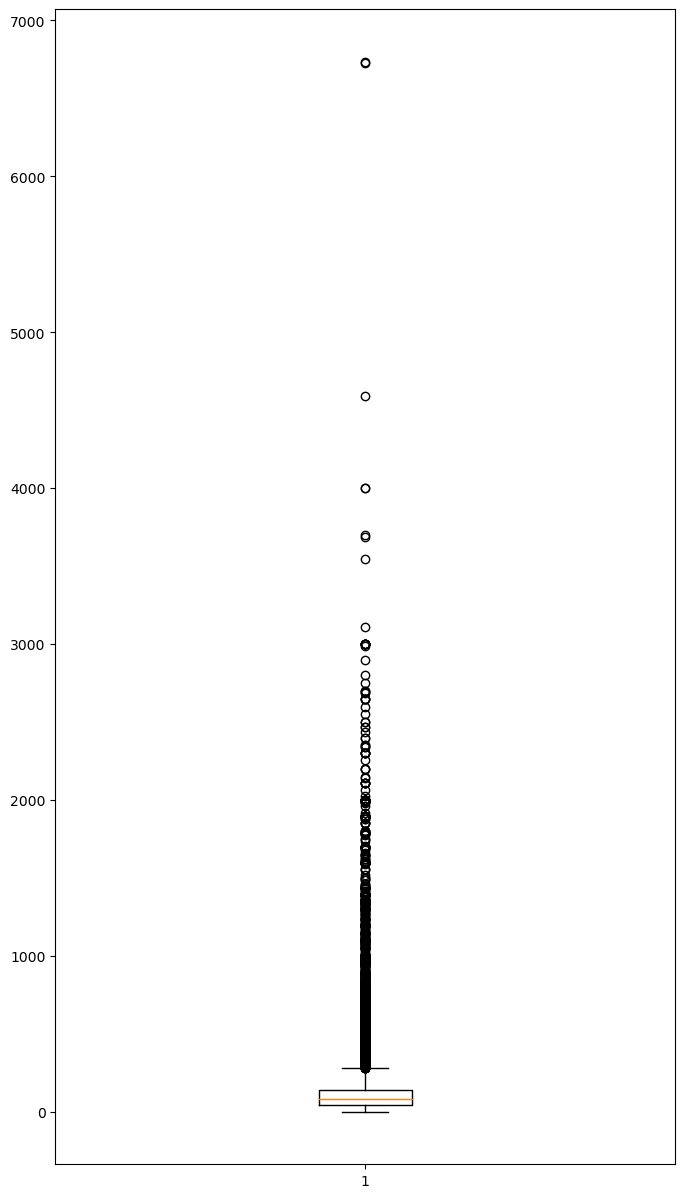

In [31]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(df.price)

plt.show()

Histograma

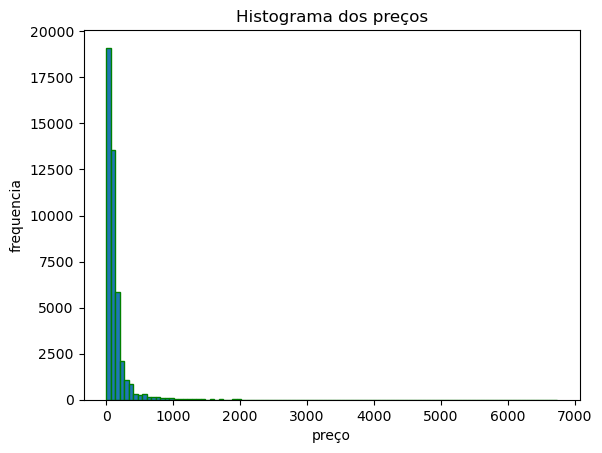

In [47]:
df["price"].plot.hist(bins = 100, edgecolor = 'green')
plt.title('Histograma dos preços')
plt.ylabel('frequencia')
plt.xlabel('preço')
plt.show()

Assimetria e Curtose

In [40]:
print(skew(df['price']))       # Assimetria
print(kurtosis(df['price']))  # Curtose

7.498142832035923
108.8034555079042


Percebeu-se que os valores possuem uma nível de assimetria muito grande e presença forte de outliers. Por se tratar de valores reais e que podem ser importantes ao modelo, a estratégia aqui pode ser a de normalizar/transformar os preços para que fiquem menos sensíveis ao modelo de predição. <br />
Modelos Recomendáveis: <br />
1. Trasformação Logarítmica
2. Escalonamento Robusto
3. Box-cox ou Yeo-Johnson

In [42]:
#Aplicação da transformação

### freight_value

Estatísticas descritivas

In [43]:
df['freight_value'].describe()

count    44487.000000
mean        20.817084
std         16.638409
min          0.000000
25%         13.400000
50%         16.780000
75%         22.110000
max        375.280000
Name: freight_value, dtype: float64

Boxplot

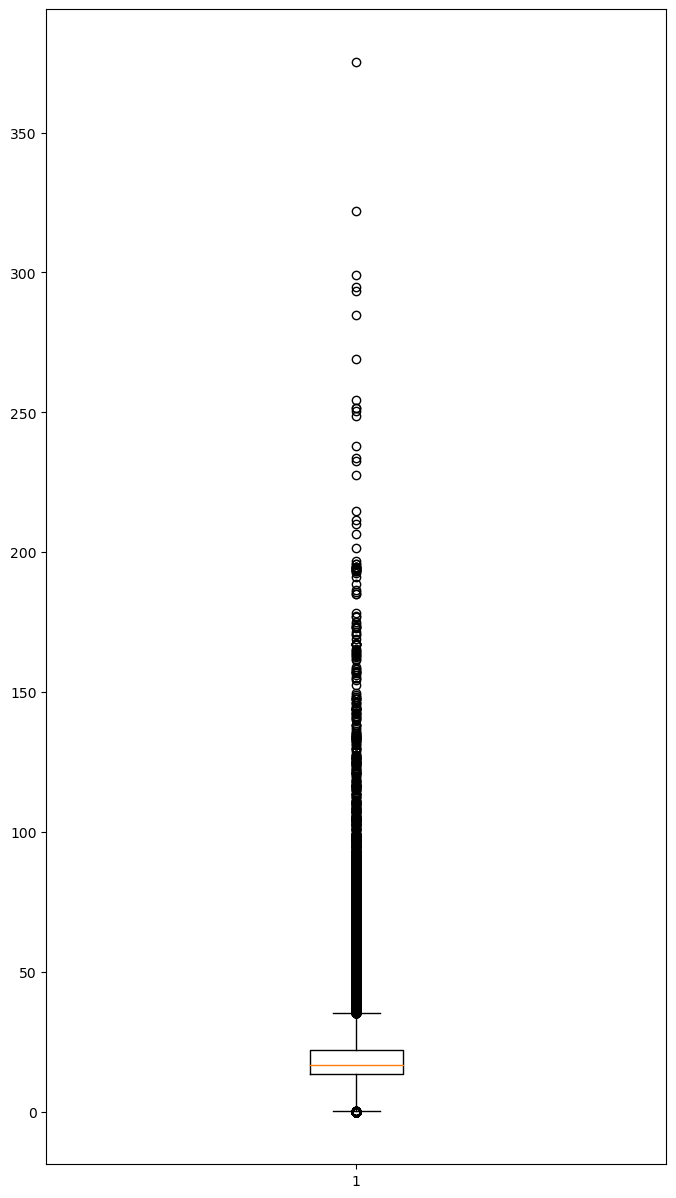

In [44]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(df.freight_value)

plt.show()

Histograma

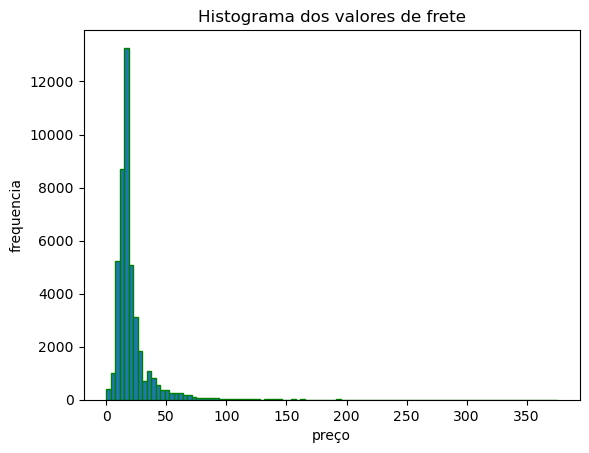

In [48]:
df["freight_value"].plot.hist(bins = 100, edgecolor = 'green')
plt.title('Histograma dos valores de frete')
plt.ylabel('frequencia')
plt.xlabel('preço')
plt.show()

Assimetria e curtose

In [50]:
print(skew(df['freight_value']))       # Assimetria
print(kurtosis(df['freight_value']))  # Curtose

4.908425767893002
42.64174699494777


Aqui talvez seja interessante realizar tranformações, mas remover os outliers pode ser algo perigoso de se fazer. Vale a pena testar como o modelo responde futuramente em diferentes abordagens

### product_photos_qty

Estatítiscas Descritivas

In [51]:
df['product_photos_qty'].describe()

count    44487.000000
mean         2.229146
std          1.734101
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         19.000000
Name: product_photos_qty, dtype: float64

Boxplot

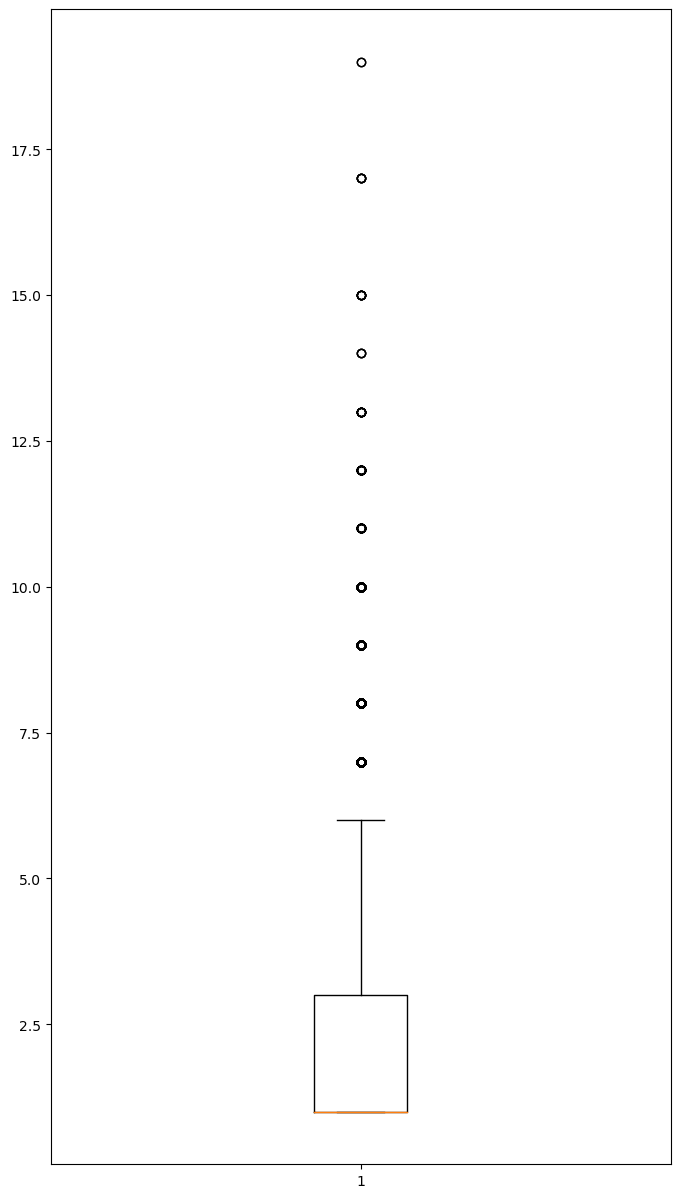

In [52]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(df.product_photos_qty)

plt.show()

Histograma 

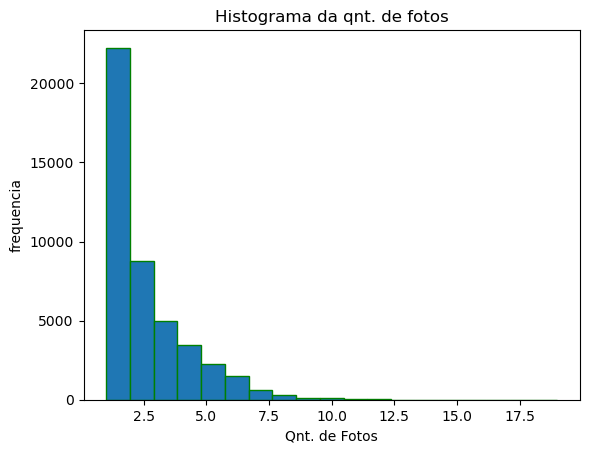

In [55]:
df["product_photos_qty"].plot.hist(bins = 19, edgecolor = 'green')
plt.title('Histograma da qnt. de fotos')
plt.ylabel('frequencia')
plt.xlabel('Qnt. de Fotos')
plt.show()

Assimetria e Curtose

In [56]:
print(skew(df['product_photos_qty']))       # Assimetria
print(kurtosis(df['product_photos_qty']))  # Curtose

1.8875363336932673
4.773035094448536


A quantidade de fotos possue pouquíssimos outliers e tem boa simetria. Talvez poderia ser feita uma categorização com base em faixas (1-2 fotos, +10) para tratar os outliers, mas essa medida talvez não seja necessária. É necessário frizar também que essa é uma variável é quantitativa e discreta.

### product_weight_g 

Estatísticas Descritivas

In [57]:
df['product_weight_g'].describe()

count    44487.000000
mean      2263.111358
std       3998.506628
min          0.000000
25%        300.000000
50%        750.000000
75%       1900.000000
max      30000.000000
Name: product_weight_g, dtype: float64

Boxplot

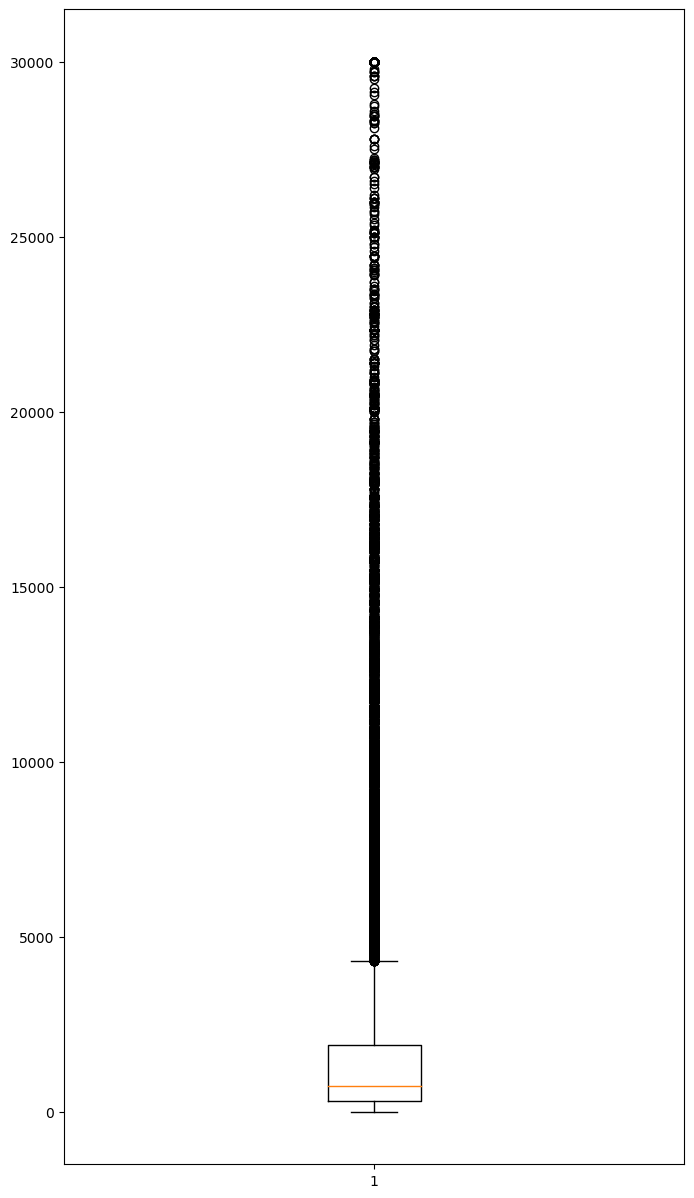

In [58]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(df.product_weight_g)

plt.show()

Histograma

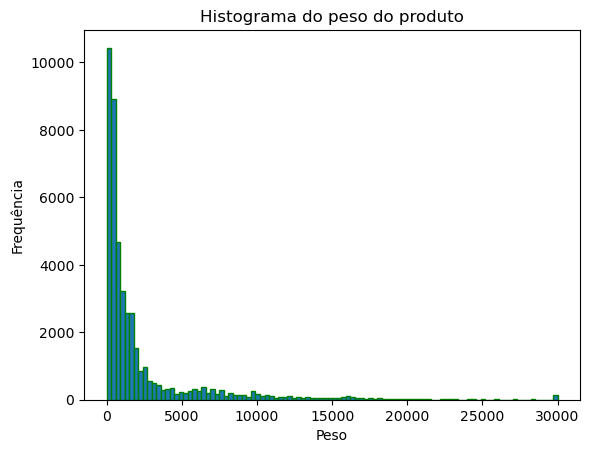

In [59]:
df["product_weight_g"].plot.hist(bins = 100, edgecolor = 'green')
plt.title('Histograma do peso do produto')
plt.ylabel('Frequência')
plt.xlabel('Peso')
plt.show()

Assimetria e Curtose

In [60]:
print(skew(df['product_weight_g']))       # Assimetria
print(kurtosis(df['product_weight_g']))  # Curtose

3.452292476345685
14.614782210680449


O peso possue uma grande quantidade de outliers, mas os valores parecem ser realistas, com produtos de até 30kg. Talvez trasformar a base para aplicação de modelos que sejam mais sensíveis seja interessantes, de modo a conservar os outliers na base de dados

### product_length_cm

Estatísticas descritivas

In [61]:
df['product_length_cm'].describe()

count    44487.000000
mean        30.498775
std         16.283665
min          7.000000
25%         18.000000
50%         25.000000
75%         39.000000
max        105.000000
Name: product_length_cm, dtype: float64

Boxplot

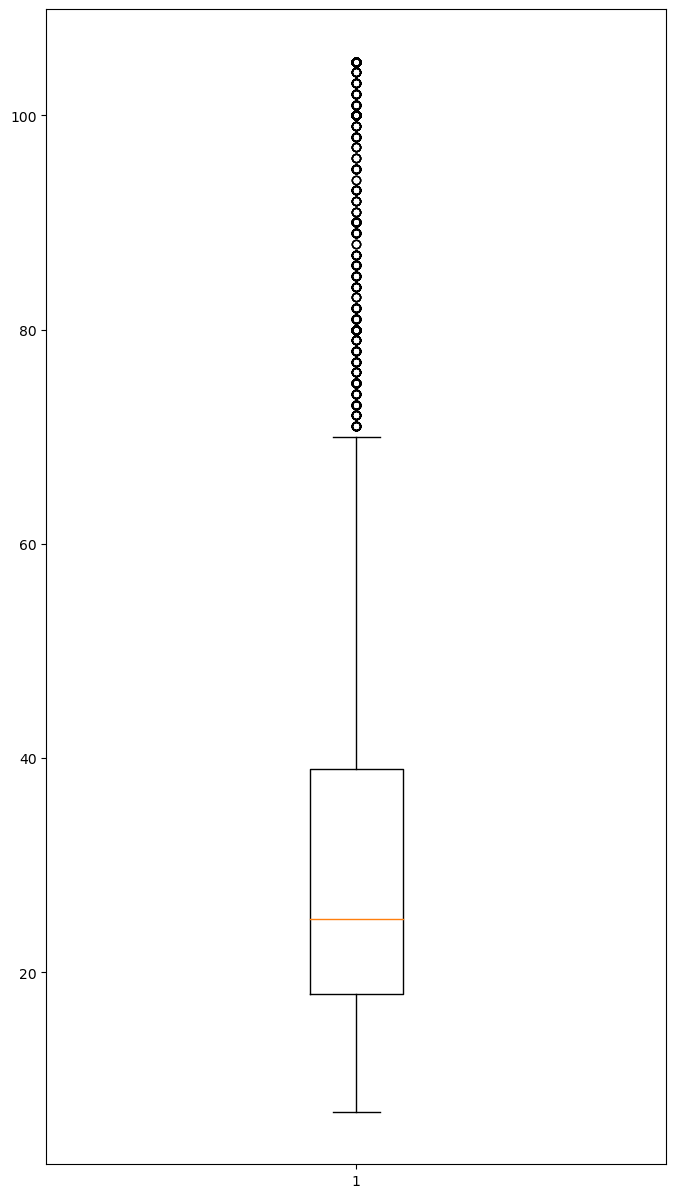

In [62]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(df.product_length_cm)

plt.show()

Histograma

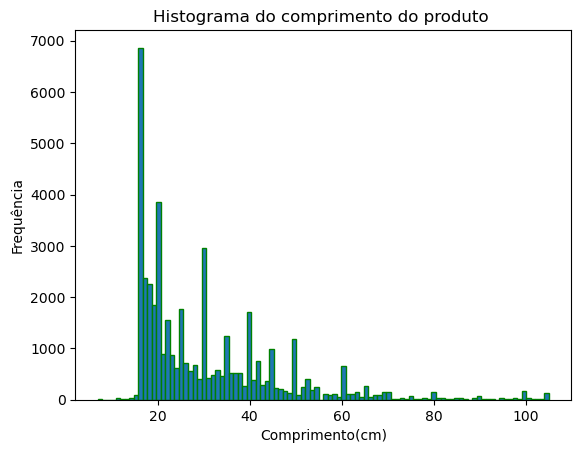

In [64]:
df["product_length_cm"].plot.hist(bins = 100, edgecolor = 'green')
plt.title('Histograma do comprimento do produto ')
plt.ylabel('Frequência')
plt.xlabel('Comprimento(cm)')
plt.show()

Assimetria e curtose

In [65]:
print(skew(df['product_length_cm']))       # Assimetria
print(kurtosis(df['product_length_cm']))  # Curtose

1.7127164102685974
3.5630640510910805


Distribuição bem simétrica, poucos outliers

### product_height_cm

### product_width_cm

### review_score

### payment_sequential

### payment_installments

### payment_value

## Exportação da base de dados (ainda não usado)

In [ ]:
#Vamos exportar essa base para csv. para termos uma melhor visualização no PowerQuerry
df.to_excel('dados_tratados.xlsx', index = False, engine='openpyxl')

## Processamento de linguagem natural (ainda não usado)

In [ ]:
"""""
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

In [ ]:
"""""
# Carregar dataset
df = pd.read_csv("olist_order_reviews_dataset.csv")

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("portuguese"))

In [ ]:
""""
# Função de limpeza
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Converter para minúsculas
    text = re.sub(r"[^\w\s]", "", text)  # Remover pontuação
    text = re.sub(r"\d+", "", text)  # Remover números
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remover stopwords e lematizar
    return " ".join(tokens)

In [ ]:
""""
# Aplicar a limpeza nos comentários
df["cleaned_review"] = df["review_comment_message"].apply(preprocess_text)
print(df[["review_comment_message", "cleaned_review"]].head())